In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(url)

## Preliminary data check

In [5]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.gt(1).any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                      True
Smoker                  False
Stroke                  False
Diabetes                 True
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                  True
MentHlth                 True
PhysHlth                 True
DiffWalk                False
Sex                     False
Age                      True
Education                True
Income                   True
dtype: bool

All binary columns except:
- `BMI`
- `Diabetes` (maybe a trinary 0/1/2 column?)
- `GenHlth`
- `MentHlth`
- `PhysHlth`
- `Age`
- `Education` (*lookup values*)
- `Income` (*lookup values*)

In [7]:
df.Diabetes.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes, dtype: int64

In [23]:
df.gt(1).sum()

HeartDiseaseorAttack         0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                     253680
Smoker                       0
Stroke                       0
Diabetes                 35346
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                 208381
MentHlth                 69462
PhysHlth                 82240
DiffWalk                     0
Sex                          0
Age                     247980
Education               253506
Income                  243869
dtype: int64

In [46]:
df_over_1 = df[df > 1][['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']]

In [47]:
df_over_1.describe()

,BMI,Diabetes,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,35346.0,208381.000000,69462.000000,82240.000000,247980.000000,253506.000000,243869.000000
mean,28.382364,2.0,2.839947,11.508091,12.946778,8.193758,5.053214,6.257195
std,6.608694,0.0,0.886169,10.255049,11.054044,2.894804,0.980382,1.842099
min,12.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,24.000000,2.0,2.000000,3.000000,3.000000,6.000000,4.000000,5.000000
50%,27.000000,2.0,3.000000,7.000000,7.000000,8.000000,5.000000,7.000000
75%,31.000000,2.0,3.000000,20.000000,25.000000,10.000000,6.000000,8.000000
max,98.000000,2.0,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


**TARGET**? HeartDiseaseorAttack

**Features**: Everything else!

## Graphs

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
HDA_ss = ss.fit_transform(df)

HDA_scaled = pd.DataFrame(HDA_ss, columns=df.columns)

Text(0.5, 1.0, 'Correlations on Scaled Data')

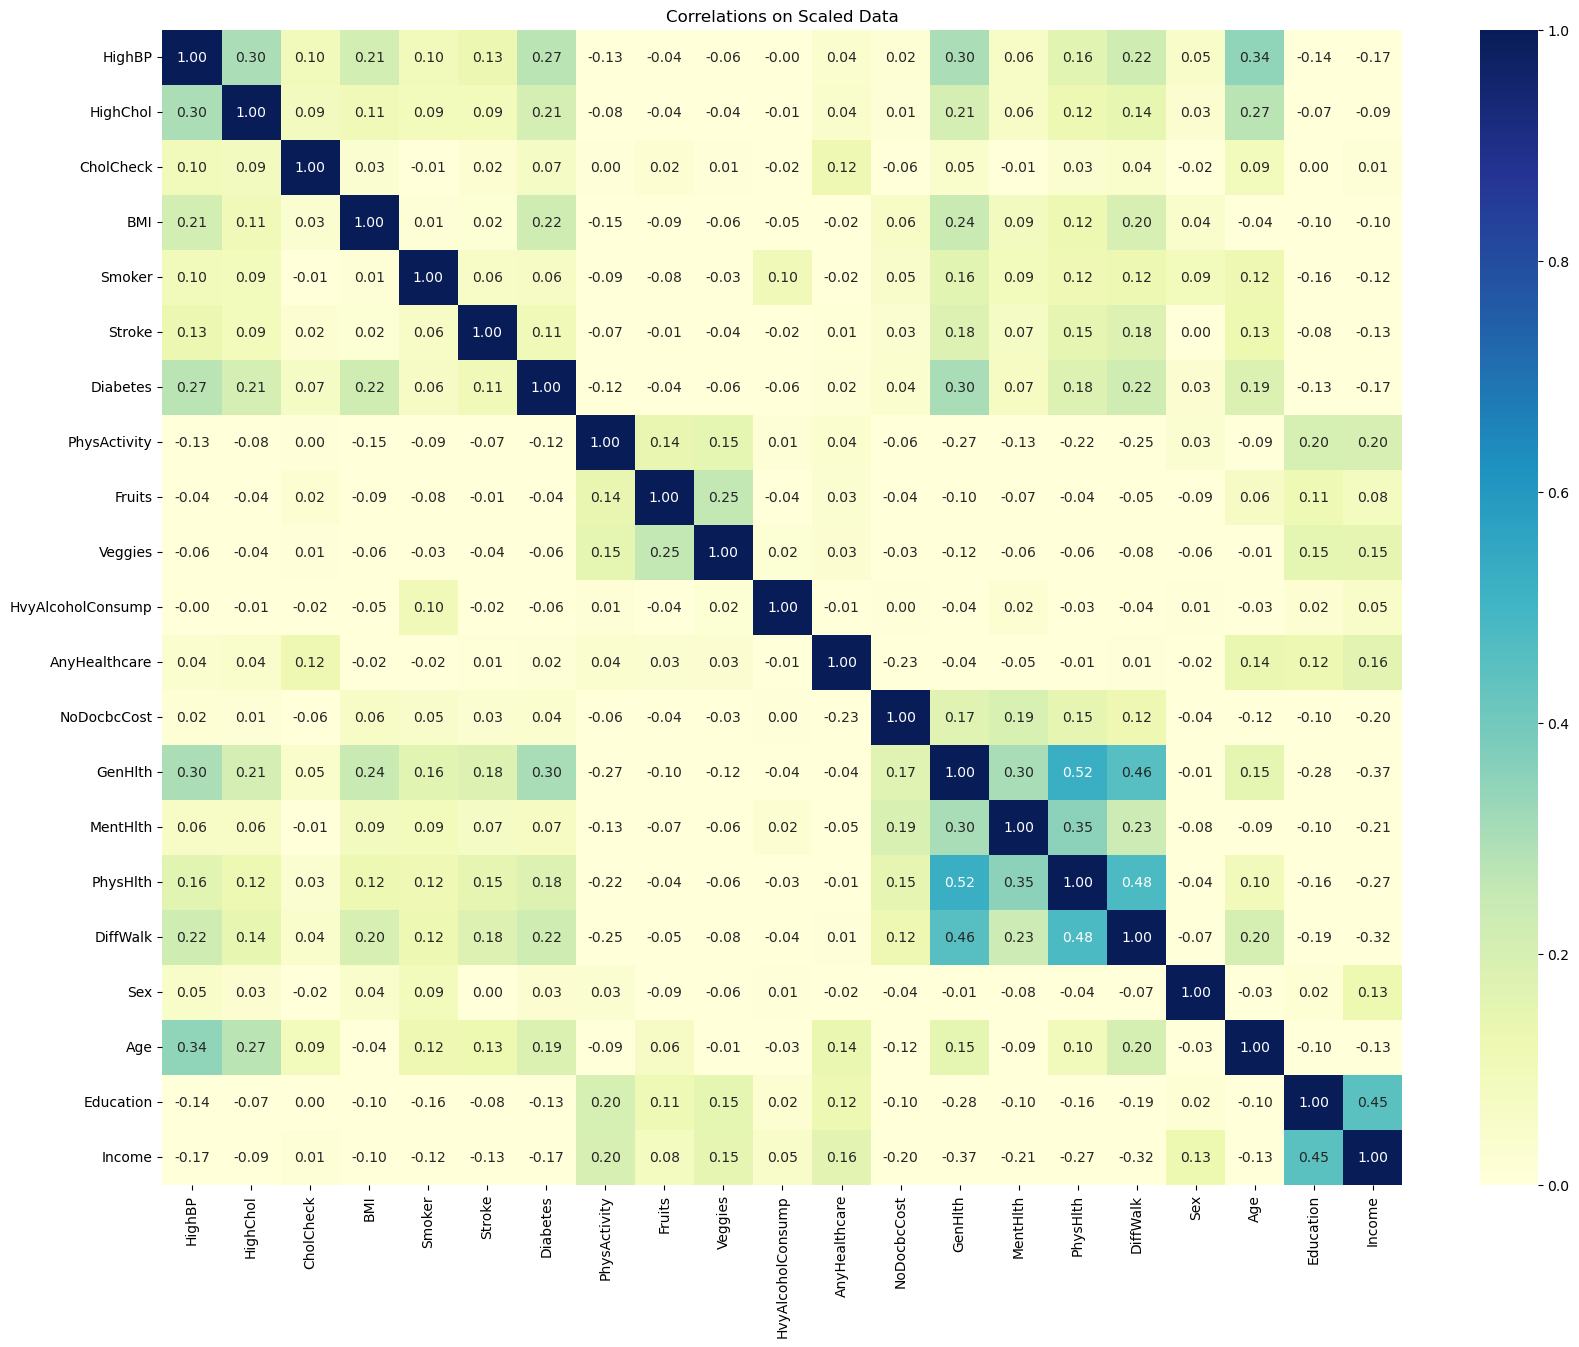

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(HDA_scaled.corr(), vmin=0, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Correlations on Scaled Data')

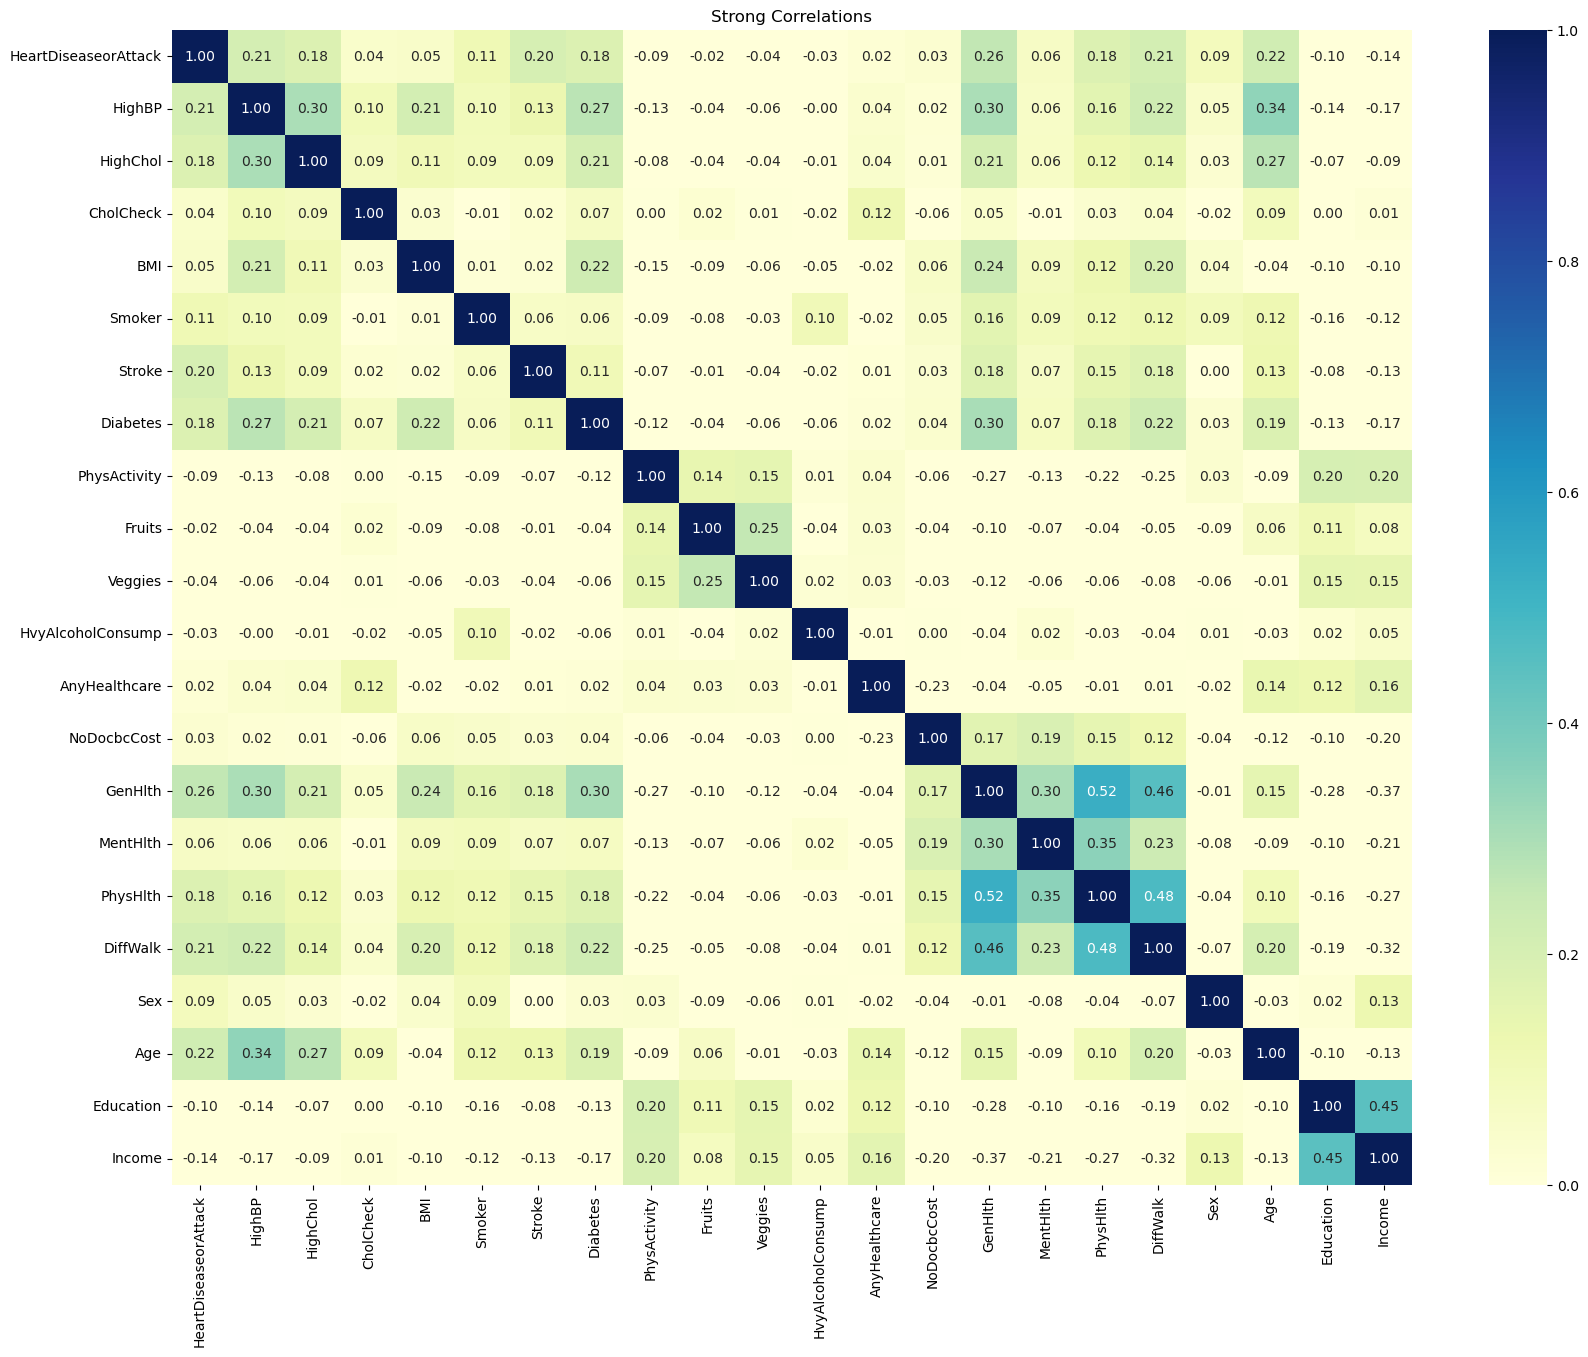

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=0, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Strong Correlations');

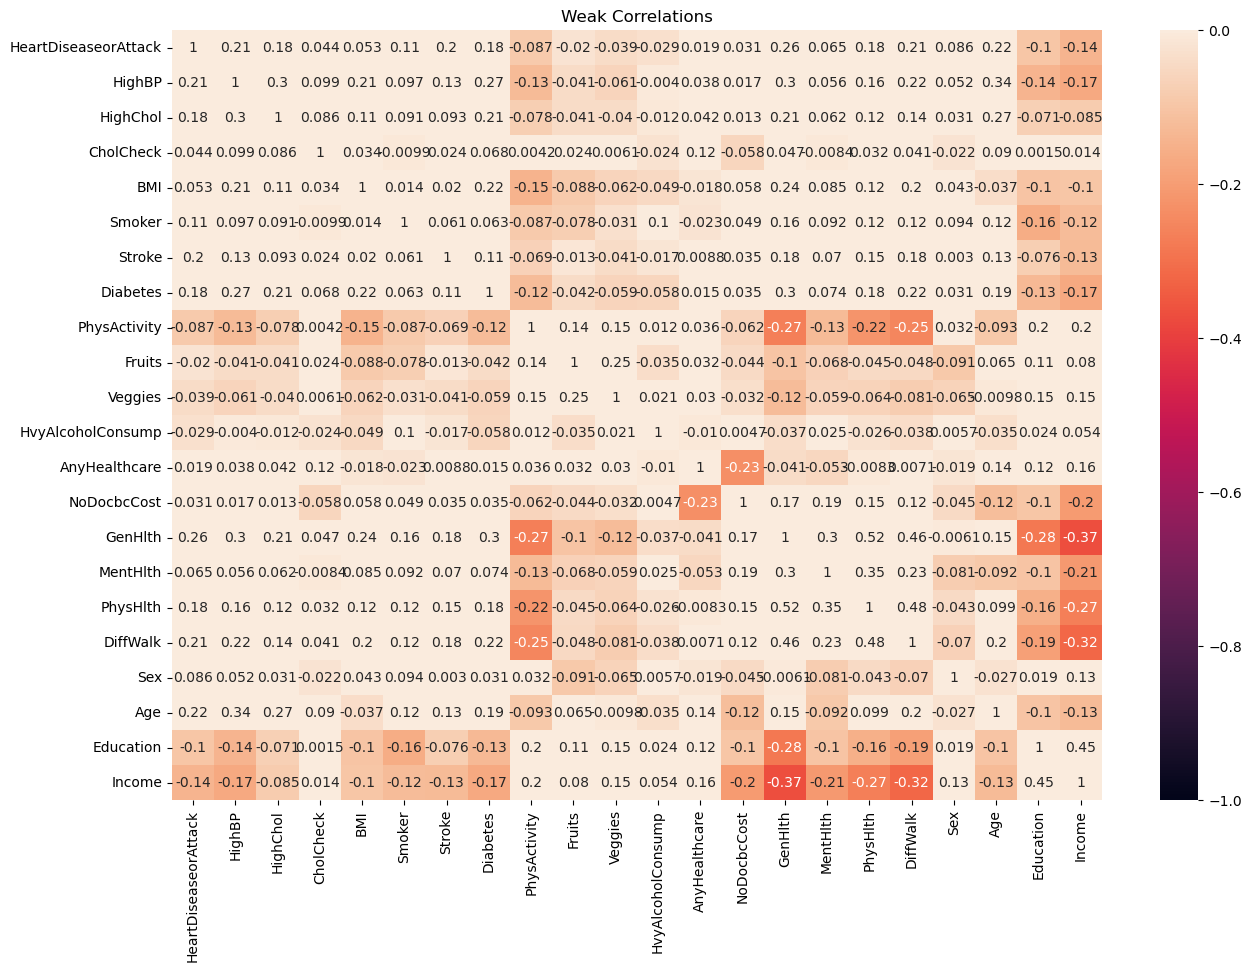

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=0, annot=True)

plt.title('Weak Correlations');

### The following graphs - meh...the last one is experimental

Text(0.5, 0, 'Diabetes')

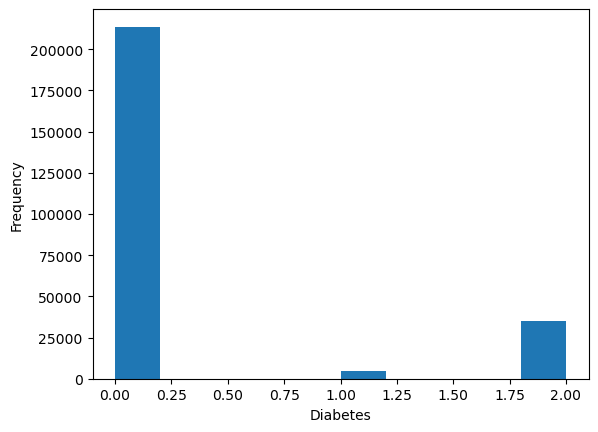

In [50]:
df.Diabetes.plot(kind='hist')
plt.xlabel('Diabetes')

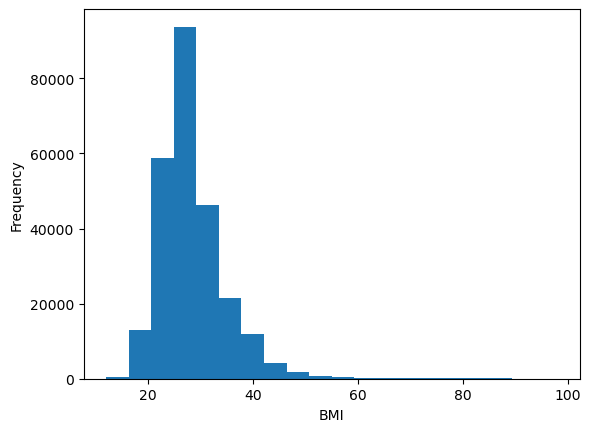

In [54]:
df.BMI.plot(kind='hist', bins=20)
plt.xlabel('BMI');

<AxesSubplot:ylabel='Frequency'>

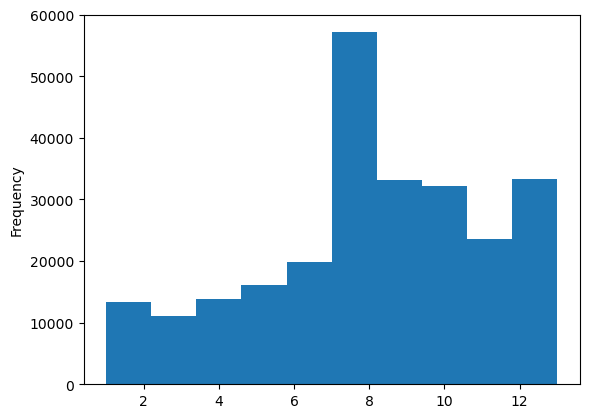

In [55]:
df.Age.plot(kind='hist')

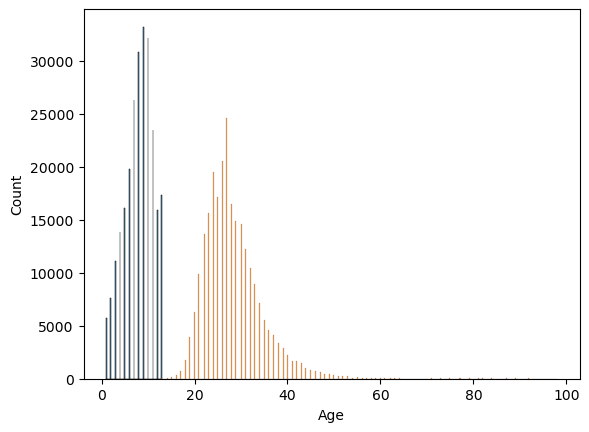

In [66]:
sns.histplot(df, x='Age')
sns.histplot(df, x='BMI')
plt.show()